# AUTOMATIC TICKET ASSIGNMENT

- Capstone Project 
- Batch aiml.2019.05
- Vinayak G Kudva

## Problem
Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

## Business Value Proposition
In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.

### 1. Problem interpretation
- Understand the data
- Make an abstract or an overview based on your approach
- Break the problem into smaller tasks
- Discuss among your teammates and share responsibilities

# Abstract

An attempt at Leveraging Machine Learning and Artifical intelligence to automatically classify tickets and assign them to the right owner in a timely manner to save effort, increase user satifaction and improve throughput in the ticketing pipeline of an organization 

### 2. Data analysis and preprocessing: Visual displays are powerful when used well, so think carefully about the information the display.
- Include any insightful visualization
- Share and explain particularly meaningful features, interactions or summary of data
- Display examples to input in your model
- Explain changes to be incorporated into data so that it becomes ready for the model
- Exploring the given Data files
- Understanding the structure of data
- Missing points in data
- Finding inconsistencies in the data
- Visualizing different patterns
- Visualizing different text features
- Dealing with missing values
- Text preprocessing
- Creating word vocabulary from the corpus of report text data
- Creating tokens as required

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing scipy stats 
import scipy
import scipy.stats as st

from google.colab import drive
drive.mount('/content/drive')

#Set your project path 
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

pip install clean-text

pip install wordcloud

In [ ]:
pip install langdetect

In [2]:
ticket_df = pd.read_excel("Input Data Synthetic (created but not used in our project).xlsx")

In [3]:
# Check top few records to get a feel of the data structure
ticket_df.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [4]:
# Observation :: caller column is useless and can be dropped

ticket_df = ticket_df.drop(['Caller'],axis=1)

In [5]:
ticket_df.head(10)

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0


In [6]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
Short description    8492 non-null object
Description          8499 non-null object
Assignment group     8500 non-null object
dtypes: object(3)
memory usage: 199.3+ KB


In [7]:
#Observation : No nulls, 8500 records

In [8]:
#Really ??  :: lets remove trailing spaces and clean the text to confirm this is really the case
#using clean-text

#remove spaces trailing
ticket_df['Short description'] = ticket_df['Short description'].str.strip()
ticket_df['Description'] = ticket_df['Description'].str.strip()

In [9]:
ticket_df.isna().sum()

Short description    8
Description          1
Assignment group     0
dtype: int64

In [10]:
ticket_df.isnull().sum()

Short description    8
Description          1
Assignment group     0
dtype: int64

Observation There are a few nulls. Lets see them

In [11]:
print(ticket_df[ticket_df.isna().any(axis=1)])

             Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description Assignment group  
2604  received from: ohdrnswl.rezuibdt@gmail.com\r\n...           GRP_34  
3383  -connected to the user system using teamviewer...            GRP_0  
3906  -user unable  tologin to vpn.\r\n-connected to...            GRP_0  
3910  -user unable  tologin to vpn.\r\n-connected to...            GRP_0  
3915  -user unable  tologin to vpn.\r\n-connected to...            GRP_0  
3921  -user unable  tologin to vpn.\r\n-connected to...            GRP_0  
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...            GRP_0  
4341  received from: eqmuniov.ehxkcbgj@gmail.com\r\n...    

Observation :: We have a few short descriptions null and few descriptions null.. MErging them makes sense.

First we will remove \r\n etc..

In [12]:
ticket_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [13]:
#remove multi space
ticket_df['Short description'] = ticket_df['Short description'].replace('\s+', ' ', regex=True)
ticket_df['Description'] = ticket_df['Description'].replace('\s+', ' ', regex=True)

In [14]:
ticket_df.head(10)

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from: hmjdrvpb.komuaywn@gmail.comhell...,GRP_0
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.comhii ...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0


In [15]:
#Now we try and get rid of short description by merging it with Description 
# check if short description is substring of DEscription. if yes nothing to be done. else append it in the begginning
ticket_df = ticket_df.replace(np.nan, '', regex=True)
ticket_df['isSubstr'] = ticket_df.apply(lambda x: x['Short description'] not in x['Description'], axis=1)
ticket_df.head(10)

,Short description,Description,Assignment group,isSubstr
0,login issue,-verified user details.(employee# & manager na...,GRP_0,True
1,outlook,received from: hmjdrvpb.komuaywn@gmail.comhell...,GRP_0,False
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.comhii ...,GRP_0,True
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,False
4,skype error,skype error,GRP_0,False
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,False
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,False
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,False
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,False
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,False


In [16]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8500 non-null object
Description          8500 non-null object
Assignment group     8500 non-null object
isSubstr             8500 non-null bool
dtypes: bool(1), object(3)
memory usage: 207.6+ KB


In [17]:
#Now we see many places short description is redundant. We will append short description to description if True only then drop short descrition

ticket_df.loc[ticket_df['isSubstr'] == True, 'Description'] = ticket_df['Short description'] + " "+ ticket_df['Description']
ticket_df.head(10)

,Short description,Description,Assignment group,isSubstr
0,login issue,login issue -verified user details.(employee# ...,GRP_0,True
1,outlook,received from: hmjdrvpb.komuaywn@gmail.comhell...,GRP_0,False
2,cant log in to vpn,cant log in to vpn received from: eylqgodm.ybq...,GRP_0,True
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,False
4,skype error,skype error,GRP_0,False
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,False
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,False
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,False
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,False
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,False


In [18]:
#Drop Short description
ticket_df = ticket_df.drop(['Short description'],axis=1)

ticket_df.tail(10)

,Description,Assignment group,isSubstr
8490,check status in purchasing please contact ed p...,GRP_29,True
8491,vpn for laptop received from: jxgobwrm.qkugdip...,GRP_34,True
8492,hr_tool etime option not visitble,GRP_0,False
8493,"erp fi - ob09, two accounts to be added i am s...",GRP_10,True
8494,tablet needs reimaged due to multiple issues w...,GRP_3,False
8495,emails not coming in from zz mail received fro...,GRP_29,True
8496,telephony_software issue,GRP_0,False
8497,vip2: windows password reset for tifpdchb pedx...,GRP_0,False
8498,machine nÃ£o estÃ¡ funcionando i am unable to ...,GRP_62,True
8499,an mehreren pc`s lassen sich verschiedene prgr...,GRP_49,False


In [19]:
ticket_df = ticket_df.drop(['isSubstr'],axis=1)

In [20]:
#Check number & Distribution of assignment groups
ticket_df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_70       1
GRP_61       1
GRP_64       1
GRP_67       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64

In [21]:
#lets see the full list
list(ticket_df['Assignment group'].value_counts())

[3976,
 661,
 289,
 257,
 252,
 241,
 215,
 200,
 184,
 145,
 140,
 129,
 118,
 116,
 107,
 100,
 97,
 88,
 85,
 81,
 69,
 68,
 62,
 56,
 45,
 44,
 40,
 39,
 39,
 37,
 36,
 35,
 31,
 31,
 30,
 29,
 27,
 25,
 25,
 25,
 20,
 19,
 18,
 16,
 15,
 15,
 14,
 11,
 11,
 9,
 8,
 8,
 6,
 6,
 6,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1]

In [22]:
# Observation :: We have 74 categories. There are few categories with very few tickets.
# It might make sense to consider only those categories with atleast 20 representations.
# Else our noise levels will be high
group_frequency = dict(ticket_df['Assignment group'].value_counts())

In [23]:
print (group_frequency)

{'GRP_0': 3976, 'GRP_8': 661, 'GRP_24': 289, 'GRP_12': 257, 'GRP_9': 252, 'GRP_2': 241, 'GRP_19': 215, 'GRP_3': 200, 'GRP_6': 184, 'GRP_13': 145, 'GRP_10': 140, 'GRP_5': 129, 'GRP_14': 118, 'GRP_25': 116, 'GRP_33': 107, 'GRP_4': 100, 'GRP_29': 97, 'GRP_18': 88, 'GRP_16': 85, 'GRP_17': 81, 'GRP_31': 69, 'GRP_7': 68, 'GRP_34': 62, 'GRP_26': 56, 'GRP_40': 45, 'GRP_28': 44, 'GRP_41': 40, 'GRP_15': 39, 'GRP_30': 39, 'GRP_42': 37, 'GRP_20': 36, 'GRP_45': 35, 'GRP_1': 31, 'GRP_22': 31, 'GRP_11': 30, 'GRP_21': 29, 'GRP_47': 27, 'GRP_48': 25, 'GRP_23': 25, 'GRP_62': 25, 'GRP_60': 20, 'GRP_39': 19, 'GRP_27': 18, 'GRP_37': 16, 'GRP_44': 15, 'GRP_36': 15, 'GRP_50': 14, 'GRP_65': 11, 'GRP_53': 11, 'GRP_52': 9, 'GRP_55': 8, 'GRP_51': 8, 'GRP_59': 6, 'GRP_49': 6, 'GRP_46': 6, 'GRP_43': 5, 'GRP_32': 4, 'GRP_66': 4, 'GRP_58': 3, 'GRP_68': 3, 'GRP_56': 3, 'GRP_38': 3, 'GRP_63': 3, 'GRP_54': 2, 'GRP_57': 2, 'GRP_71': 2, 'GRP_69': 2, 'GRP_72': 2, 'GRP_73': 1, 'GRP_70': 1, 'GRP_61': 1, 'GRP_64': 1, 'GRP_67

In [24]:
#eliminate groups that have very less representation
group_elimination_treshold = 20

In [25]:
group_frequency_filtered = dict(filter(lambda x: x[1] > group_elimination_treshold, group_frequency.items()))

In [26]:
print (group_frequency_filtered)

{'GRP_0': 3976, 'GRP_8': 661, 'GRP_24': 289, 'GRP_12': 257, 'GRP_9': 252, 'GRP_2': 241, 'GRP_19': 215, 'GRP_3': 200, 'GRP_6': 184, 'GRP_13': 145, 'GRP_10': 140, 'GRP_5': 129, 'GRP_14': 118, 'GRP_25': 116, 'GRP_33': 107, 'GRP_4': 100, 'GRP_29': 97, 'GRP_18': 88, 'GRP_16': 85, 'GRP_17': 81, 'GRP_31': 69, 'GRP_7': 68, 'GRP_34': 62, 'GRP_26': 56, 'GRP_40': 45, 'GRP_28': 44, 'GRP_41': 40, 'GRP_15': 39, 'GRP_30': 39, 'GRP_42': 37, 'GRP_20': 36, 'GRP_45': 35, 'GRP_1': 31, 'GRP_22': 31, 'GRP_11': 30, 'GRP_21': 29, 'GRP_47': 27, 'GRP_48': 25, 'GRP_23': 25, 'GRP_62': 25}


In [27]:
#Lets now filter the data frame and retain only the necessary groups(Filtered)
valid_grp_list = list(group_frequency_filtered)

In [28]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
Description         8500 non-null object
Assignment group    8500 non-null object
dtypes: object(2)
memory usage: 132.9+ KB


In [57]:
#eliminate

ticket_df_filtered = ticket_df[ticket_df['Assignment group'].isin(valid_grp_list)]
ticket_df_filtered.head(10)

,Description,Assignment group
0,login issue -verified user details.(employee# ...,GRP_0
1,received from: hmjdrvpb.komuaywn@gmail.comhell...,GRP_0
2,cant log in to vpn received from: eylqgodm.ybq...,GRP_0
3,unable to access hr_tool page,GRP_0
4,skype error,GRP_0
5,unable to log in to engineering tool and skype,GRP_0
6,event: critical:HostName_221.company.com the v...,GRP_1
7,ticket_no1550391- employment status - new non-...,GRP_0
8,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant_874773,GRP_0


In [58]:
ticket_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8274 entries, 0 to 8498
Data columns (total 2 columns):
Description         8274 non-null object
Assignment group    8274 non-null object
dtypes: object(2)
memory usage: 193.9+ KB


In [59]:
ticket_df_filtered.describe()

,Description,Assignment group
count,8274,8274
unique,7605,40
top,password reset,GRP_0
freq,32,3976


We have reduced from 8500 to 8274

Also seen is high number of gmail addresses.. the user email in the ticket description is not useful. lets filter that.

In [60]:
ticket_df_filtered['Description'] = ticket_df_filtered['Description'].replace('\S*@\S*\s?', ' ', regex=True)
ticket_df_filtered.head(10)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Description,Assignment group
0,login issue -verified user details.(employee# ...,GRP_0
1,"received from: team,my meetings/skype meeting...",GRP_0
2,cant log in to vpn received from: cannot log ...,GRP_0
3,unable to access hr_tool page,GRP_0
4,skype error,GRP_0
5,unable to log in to engineering tool and skype,GRP_0
6,event: critical:HostName_221.company.com the v...,GRP_1
7,ticket_no1550391- employment status - new non-...,GRP_0
8,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant_874773,GRP_0


In [61]:
#lets remove special characters and keep it plain text
ticket_df_filtered['Description'] = ticket_df_filtered['Description'].replace('[^\w\s]',' ',regex=True)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


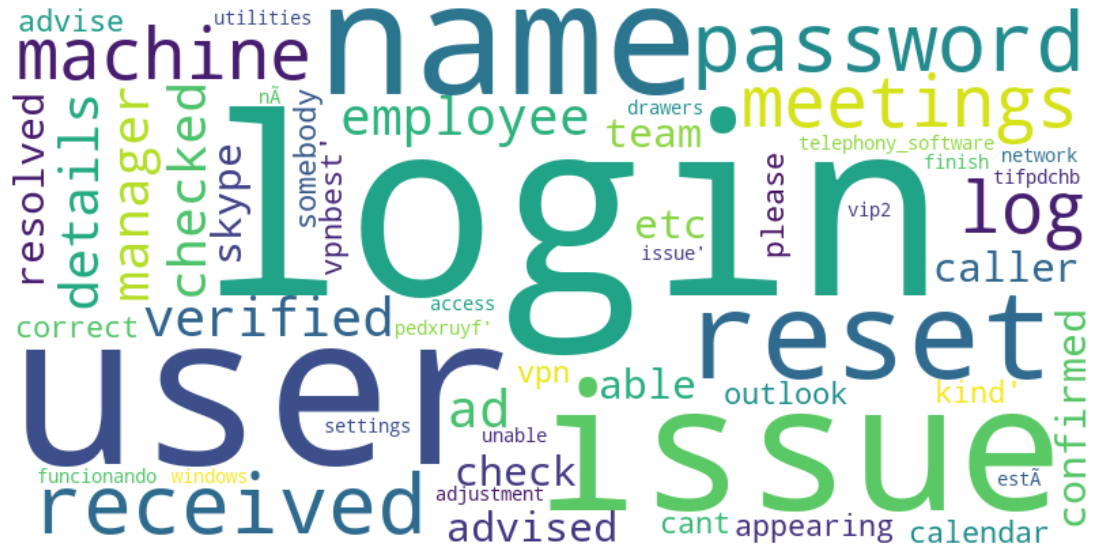

In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#word cloud for overall data
text_blob = ticket_df_filtered['Description'].values 
stopwords = STOPWORDS

wordcloud = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(text_blob))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

We observe some strange words like comhii nA~ funcionando estA~
Hence there is possible non-english language rows. We should separate them.. else it might confuse the model..

In [69]:
#trying to make a data frame with only english data..
from langdetect import detect
ticket_df_eng = ticket_df_filtered.copy()
ticket_df_eng[ticket_df_eng['Description'].apply(lambda x : detect(x))=='en']

,Description,Assignment group
0,login issue verified user details employee ...,GRP_0
1,received from team my meetings skype meeting...,GRP_0
2,cant log in to vpn received from cannot log ...,GRP_0
3,unable to access hr_tool page,GRP_0
5,unable to log in to engineering tool and skype,GRP_0
...,...,...
8494,tablet needs reimaged due to multiple issues w...,GRP_3
8495,emails not coming in from zz mail received fro...,GRP_29
8496,telephony_software issue,GRP_0
8497,vip2 windows password reset for tifpdchb pedx...,GRP_0


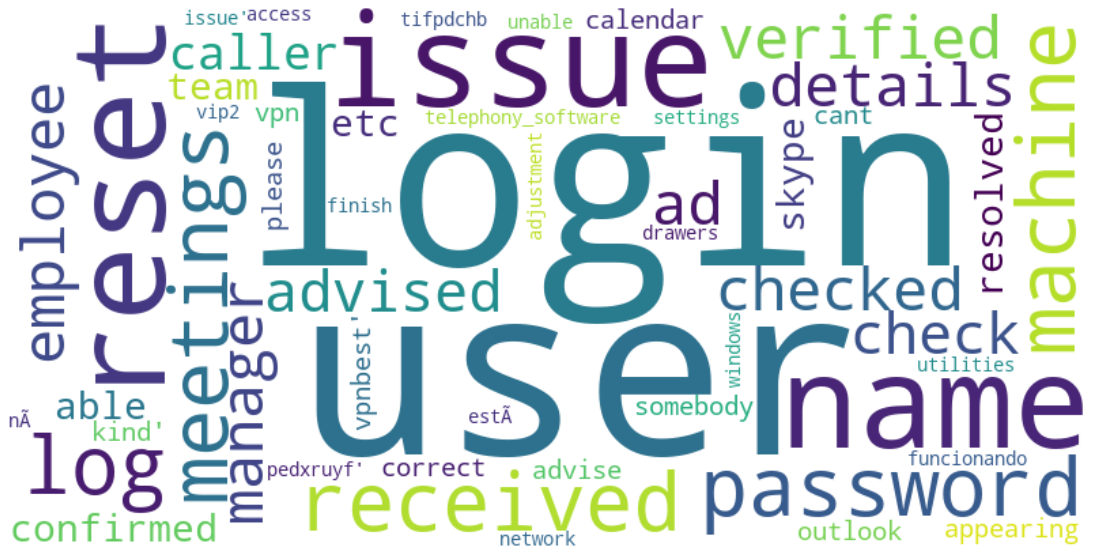

In [70]:
wordcloud_eng = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(ticket_df_eng['Description'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_eng,interpolation='bilinear')
plt.axis("off")
plt.show()

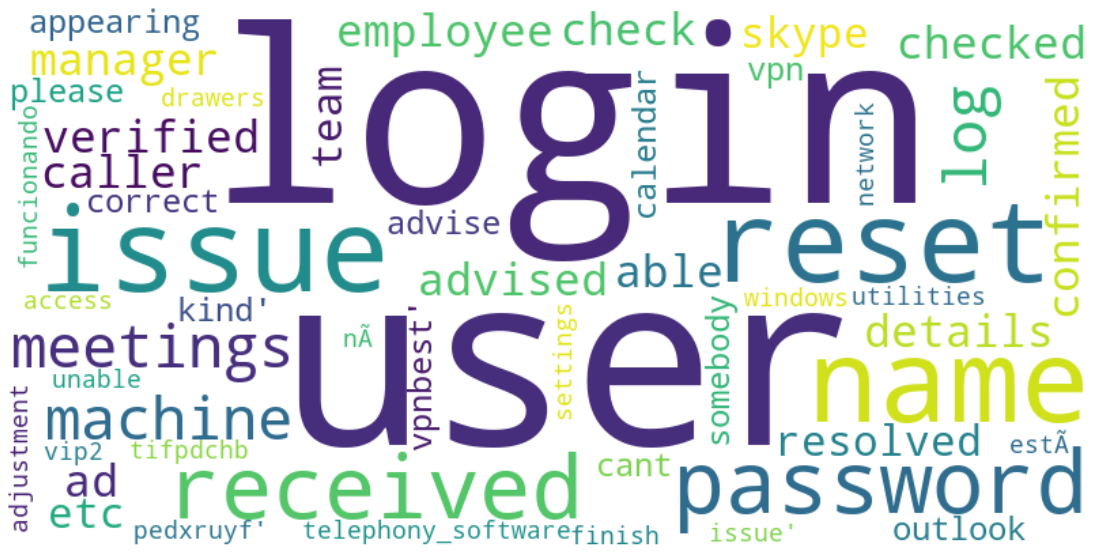

In [73]:
#word cloud for top 3 groups data

#GRP_0     3976
ticket_df_grp0 = ticket_df_filtered.copy()
ticket_df_grp0[ticket_df_grp0['Assignment group'].apply(lambda x : x =='GRP_0')]
wordcloud_grp0 = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(ticket_df_grp0['Description'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_grp0,interpolation='bilinear')
plt.axis("off")
plt.show()


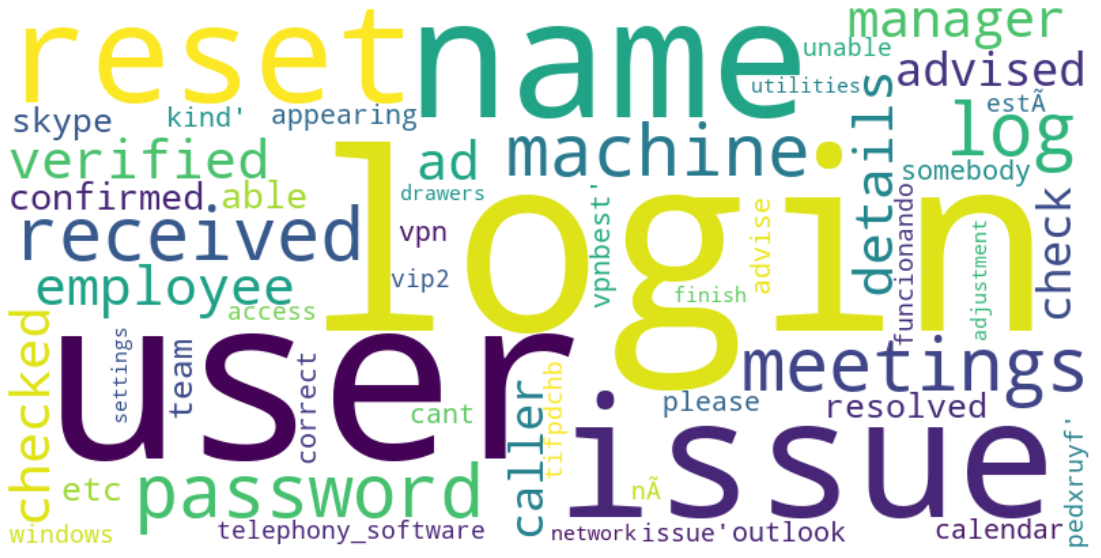

In [74]:
#GRP_8      661
ticket_df_grp8 = ticket_df_filtered.copy()
ticket_df_grp8[ticket_df_grp8['Assignment group'].apply(lambda x : x =='GRP_8')]
wordcloud_grp8 = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(ticket_df_grp8['Description'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_grp8,interpolation='bilinear')
plt.axis("off")
plt.show()

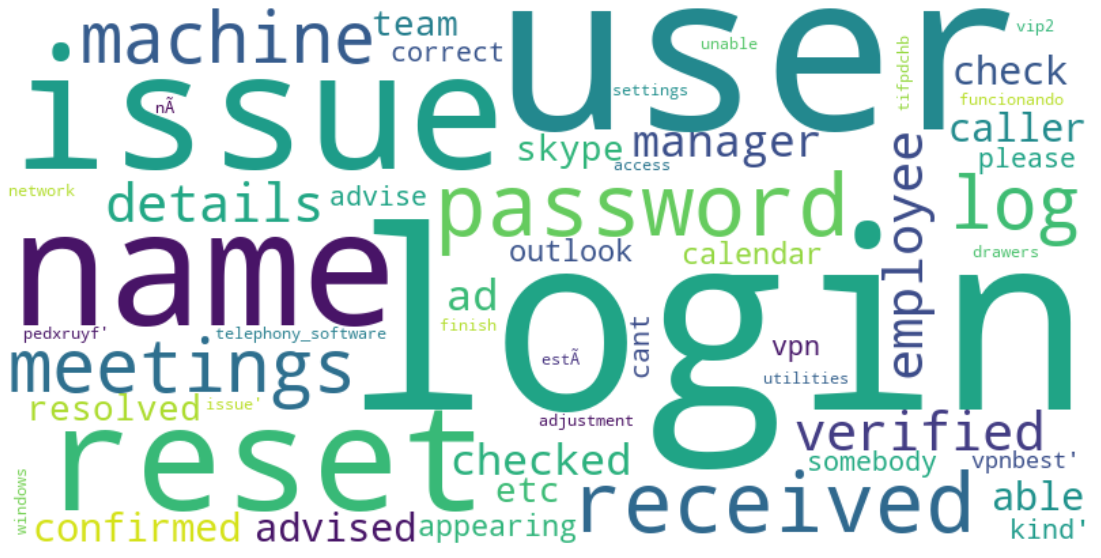

In [75]:
#GRP_24     289
ticket_df_grp24 = ticket_df_filtered.copy()
ticket_df_grp24[ticket_df_grp24['Assignment group'].apply(lambda x : x =='GRP_8')]
wordcloud_grp24 = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(ticket_df_grp24['Description'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_grp24,interpolation='bilinear')
plt.axis("off")
plt.show()

### 3. Modeling
- What kind of neural network you have used and why?
- What progress you have made towards your intended solution?
- Building a model architecture which can classify.
- Trying different model architectures by researching state of the art for similar tasks.
- Train the model
- To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch

### 4. Model evaluation
- Describe how you will proceed with the analysis
- Compare different models and choose which model to use
- Do hyper-parameter tuning of your model
- How will you build on your initial analysis to increase the accuracy of your model?
- Test the model and report as per evaluation metrics
- Try different models
- Try different evaluation metrics
- Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
- Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.
